In [2]:
import cv2
import os


video_path = "/Users/saurabh/Pictures/Photo Booth Library/Pictures/sachin_vid.mov"  # <-- change this if needed
output_folder = "/Users/saurabh/Downloads/people_frames/sachin_frames"
prefix = "frame"
frame_skip = 1  # save every frame; set to 2, 5, to skip frames

os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video.")
else:
    frame_count = 0
    saved_count = 0

    while True:
        success, frame = cap.read()
        if not success:
            break

        if frame_count % frame_skip == 0:
            filename = os.path.join(output_folder, f"{prefix}_{saved_count:05d}.jpg")
            cv2.imwrite(filename, frame)
            saved_count += 1

        frame_count += 1

    cap.release()
    print(f"Done! Saved {saved_count} frames to {output_folder}")

[ WARN:0@4.481] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0@4.481] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/videoio/src/cap.cpp (166) open VIDEOIO(GSTREAMER): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'




Done! Saved 162 frames to /Users/saurabh/Downloads/people_frames/sachin_frames


In [3]:
from tensorflow.keras.models import load_model
import tensorflow as tf

2025-08-17 10:21:31.825191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import cv2
import imghdr

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [7]:
data = tf.keras.utils.image_dataset_from_directory('/Users/saurabh/Downloads/people_frames')

Found 400 files belonging to 2 classes.


2025-08-17 10:22:34.079918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()


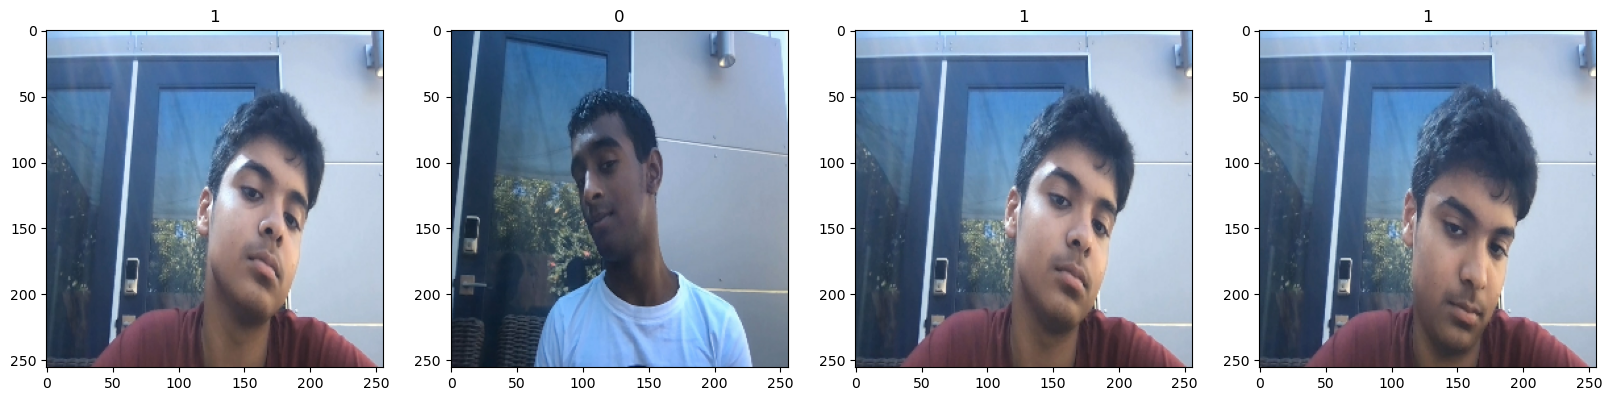

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data = data.map(lambda x,y: (x/255,y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.6039216 , 0.7374789 , 0.87406176],
          [0.60723233, 0.73786575, 0.8725529 ],
          [0.6112305 , 0.744897  , 0.8819853 ],
          ...,
          [0.5206667 , 0.6889265 , 0.85773784],
          [0.5560049 , 0.7389706 , 0.90367645],
          [0.608027  , 0.78296566, 0.9406863 ]],
 
         [[0.5924001 , 0.7416054 , 0.8892789 ],
          [0.5946021 , 0.7418505 , 0.89185625],
          [0.5980488 , 0.7440468 , 0.8958333 ],
          ...,
          [0.5099878 , 0.6782476 , 0.85269606],
          [0.5479837 , 0.73094934, 0.8951708 ],
          [0.5982843 , 0.77322304, 0.9309436 ]],
 
         [[0.5708678 , 0.73837507, 0.9051643 ],
          [0.5740713 , 0.7414924 , 0.90525043],
          [0.5724016 , 0.73927695, 0.9039828 ],
          ...,
          [0.49669117, 0.6609796 , 0.8396197 ],
          [0.54895836, 0.72542894, 0.8894608 ],
          [0.59675246, 0.76691175, 0.92702204]],
 
         ...,
 
         [[0.22849265, 0.25202206, 0.30692402],
          [0.22946

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size

9

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
train


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()


In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 8s 673ms/step - loss: 0.2282 - accuracy: 0.9271 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 2/20
9/9 [==============================] - 6s 666ms/step - loss: 3.9860e-04 - accuracy: 1.0000 - val_loss: 6.3209e-07 - val_accuracy: 1.0000
Epoch 3/20
9/9 [==============================] - 6s 654ms/step - loss: 1.0174e-07 - accuracy: 1.0000 - val_loss: 6.0875e-09 - val_accuracy: 1.0000
Epoch 4/20
9/9 [==============================] - 6s 658ms/step - loss: 4.0256e-09 - accuracy: 1.0000 - val_loss: 5.6103e-09 - val_accuracy: 1.0000
Epoch 5/20
9/9 [==============================] - 6s 654ms/step - loss: 2.6055e-09 - accuracy: 1.0000 - val_loss: 2.1513e-09 - val_accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 7s 724ms/step - loss: 1.8871e-09 - accuracy: 1.0000 - val_loss: 1.3748e-09 - val_accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 7s 716ms/step - loss: 1.8873e-09 - accuracy: 1.0000 - val_loss: 2.6712

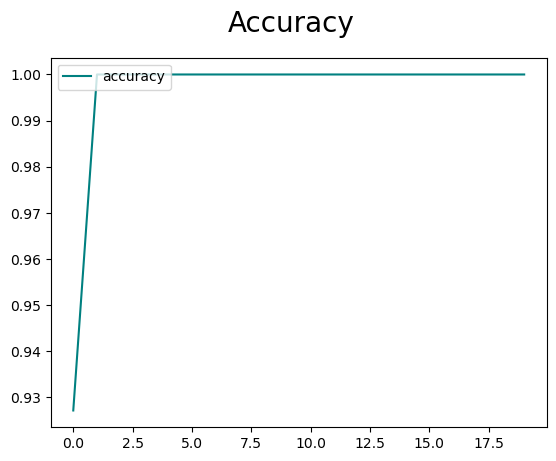

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

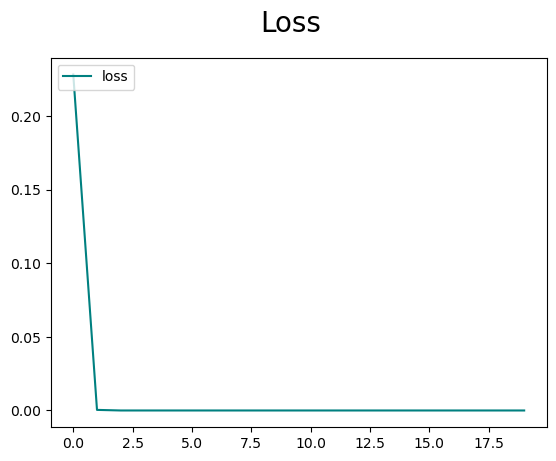

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 261ms/step


In [32]:
image = cv2.imread('/Users/saurabh/Downloads/sidpic.jpeg')
resize = tf.image.resize(image, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 44ms/step


In [33]:
if yhat > 0.5:
    print("sid")
else:
    print("sachin")

sid


In [1]:
import cv2
import time
import tensorflow as tf
def take_pic():
    cam = cv2.VideoCapture(0)
    if not cam.isOpened():
        print("Error")

    time.sleep(3)

    ret, frame = cam.read()
    cam.release()
    if ret:
        cv2.imwrite("/Users/saurabh/Downloads/captured_pic.jpg", frame)
    else:
        print("Error trying to take picture")
    image = cv2.imread("/Users/saurabh/Downloads/captured_pic.jpg")
    resize = tf.image.resize(image, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))

    if yhat > 0.5:
        result_label.config(text="Predicted person is Sidhant")
    else:
        result_label.config(text="Predicted person is Sachin")

from tkinter import Tk, filedialog
import tkinter as tk



window = tk.Tk()
window.title("Face Recognition Application")

button_frame = tk.Frame(window)

result_label = tk.Label(window, text=" ", font=("Arial", 18))
result_label.grid(row=1, column=1)

def take_pic():
    cam = cv2.VideoCapture(0)
    if not cam.isOpened():
        print("Error")

    time.sleep(3)

    ret, frame = cam.read()
    cam.release()
    if ret:
        cv2.imwrite("/Users/saurabh/Downloads/captured_pic.jpg", frame)
    else:
        print("Error trying to take picture")
        
    image = cv2.imread("/Users/saurabh/Downloads/captured_pic.jpg")
    resize = tf.image.resize(image, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))

    if yhat > 0.5:
        result_label.config(text="Predicted person is Sidhant")
    else:
        result_label.config(text="Predicted person is Sachin")
tk.Button(window, text="Take picture:", width=10, command=take_pic).grid(row=0, column=1)

window.mainloop()

2025-07-29 12:06:08.426219: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[ WARN:0@11.935] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
2025-07-29 12:06:21.164 python[3720:2035758] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
2025-07-29 12:06:24.904294: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with

In [ ]:
from tkinter import Tk, filedialog
import tkinter as tk

button_frame = tk.Frame()

In [ ]:
window = tk.Tk()
window.title("Face Recognition Application")

In [ ]:
button_frame = tk.Frame()

In [ ]:
tk.Button(window, text="Take picture:", width=10, command=take_pic())